# MNIST Deep Learning

- A simple classification of digits using the MNIST dataset

### First introduce some important libraries/frameworks

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras

### Load mnist dataset

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
df = mnist.load_data()

In [4]:
(x_train,y_train),(x_test,y_test) = df

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

- Prechecking a single image from loaded data set

In [7]:
image = x_train[1]

In [8]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

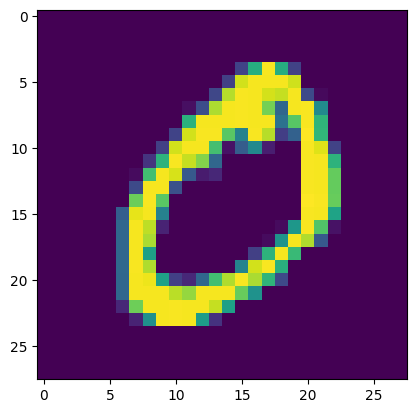

In [9]:
plt.imshow(image)

### Data prep

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

- onehotencode data to 1s and 0s, with 10 classes, using to_categorical
- y_train , y_test

In [12]:
y_train_cat = to_categorical(y_train, 10)

In [13]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_test_cat = to_categorical(y_test, 10)

In [15]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [16]:
image.max(),image.min()

(255, 0)

- Dividing data by 255 to fit RGB 0-255 data as well

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
new_image = x_train[1]

In [20]:
new_image.min(),new_image.max()

(0.0, 1.0)

In [21]:
x_train.shape 

(60000, 28, 28)

- shape does not contain the color channels
- Put set into black & white 
- reshape(size, width, height, # of channels 1 for black/white or 3 for RGB)

In [22]:
x_train = x_train.reshape(60000,28,28,1)

In [23]:
x_test = x_test.reshape(10000,28,28,1)

In [24]:
x_test.shape

(10000, 28, 28, 1)

### Build Model

In [25]:
from tensorflow.keras.models import Sequential

- Can use shift+tab to look up various imports

In [26]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D, Flatten

- Using shift+tab, all the parameters for the convolution 2d can be viewed:
    - filters,
    - kernel_size,
    - strides=(1, 1),
    - padding='valid'

- keras.io/metrics for more metrics evaluations

In [27]:
model = Sequential()
model.add(Conv2D(filters = 20, kernel_size = (4,4), strides=(1,1), padding="valid", input_shape = (28,28,1), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(140, activation = 'relu'))

#softmax for multi-class, instead of logistic classifier for binary class
model.add(Dense(10,activation='softmax' ))

model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics = ['accuracy'])

- Used convolution layers first, conv2d for filter proceeded by maxpooling to decrease size/bandwidth/info to be put into model
- convolution layers are flattened and followed by one dense layer with 140 neurons(previously tested a lesser 120 neurons) and one final output layer with activation function softmax that is designated for multiclassification

### Train Model

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

Used early stopping to prevent epochs from reiterating after valdation loss goes positive

In [29]:
stoploss = EarlyStopping(monitor="val_loss", patience = 1)

- Some variables for fit() using shift+tab
    - batch_size=None,
    - epochs=1,
    - callbacks=None,
    - validation_split=0.0,
    - validation_data=None,
    - initial_epoch=0,
    - steps_per_epoch=None,
    - validation_steps=None

In [30]:
model.fit(x_train,y_train_cat, epochs=30,validation_data = (x_test,y_test_cat), callbacks =[stoploss])

Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1471 - accuracy: 0.9566 - val_loss: 0.0642 - val_accuracy: 0.9789
Epoch 2/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0495 - accuracy: 0.9845 - val_loss: 0.0420 - val_accuracy: 0.9859
Epoch 3/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0316 - accuracy: 0.9899 - val_loss: 0.0441 - val_accuracy: 0.9856


### Results of training model

In [31]:
metrics = pd.DataFrame(model.history.history)

In [32]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.147139,0.956633,0.064204,0.9789
1,0.049514,0.984483,0.041989,0.9859
2,0.031577,0.989867,0.044087,0.9856


In [33]:
model.metrics_names

['loss', 'accuracy']

<Axes: >

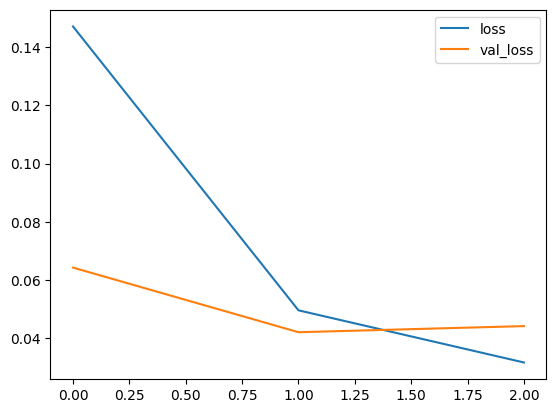

In [34]:
metrics[['loss', 'val_loss']].plot()

- As iterated further (subsequent epoch) loss decreased
- As soon as val_loss increased, automatically stopped epoch

<Axes: >

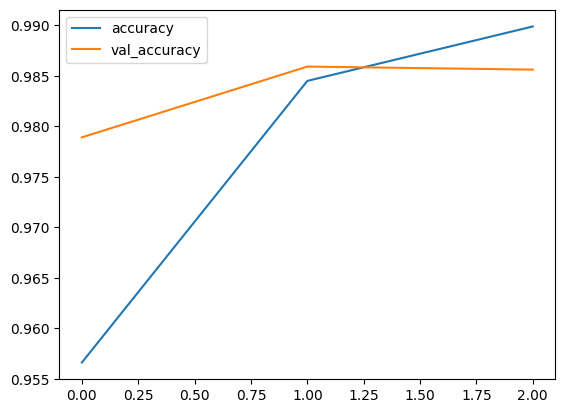

In [35]:
metrics[['accuracy', 'val_accuracy']].plot()

In [36]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 1s 5ms/step - loss: 0.0441 - accuracy: 0.9856


[0.04408714175224304, 0.9855999946594238]

- Above is final loss and accuracy

In [37]:
from sklearn.metrics import classification_report

- Will have classification report based on true values to predicted values of model

In [38]:
predict = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 1s 4ms/step


In [39]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.97      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



- After playing with a few hyperparameters there were some findings:
    - Decreasing neurons in dense layer of cnn reduced the accuracy (120), while increasing neurons to 140 brought accuracy much closer to 100% with epochs
    - Compared to the less neuron model, the model with more neurons actually had more epochs, but was closer to 100% (99%) than the lesser neuron model
    - Accuracy tapers off sharply after hitting 1-2 iterations/epochs
    - I found out the softmax activation is more geared towards multi-classification
    - The model was fairly accururate considering it only really used one filter (maxpooling was just desizing) and one other midde layer using 140 neurons